# Seaborn tutorial by DerekBanaa
[Video link here](https://www.youtube.com/watch?v=6GUZXDef2U0)

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

seaborn bydefault have some datasets, let's list their names

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


now let's load one

In [3]:
carCrashes_df = sns.load_dataset('car_crashes')
(carCrashes_df.head())

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Distribution plot
**A histogram**  
here, **bins** mean number of divisions in the x axis.  
while **kde** means 'Kernel Density Estimation'

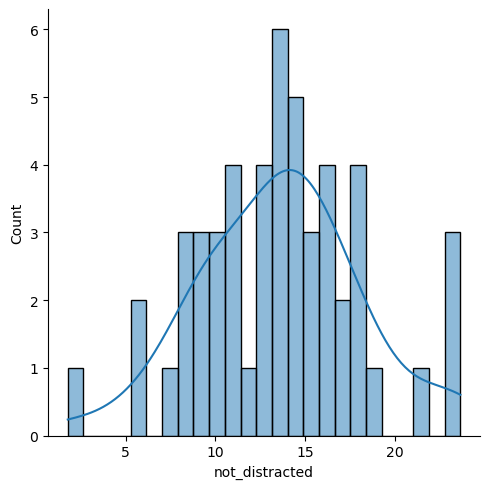

In [4]:
sns.displot(carCrashes_df['not_distracted'], bins=25, kde=True)

## KDE Plot
**KDE**: Kernel Density Estimation,  
KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization. It provides a smoothed representation of the underlying distribution of a dataset.

<Axes: xlabel='alcohol', ylabel='Density'>

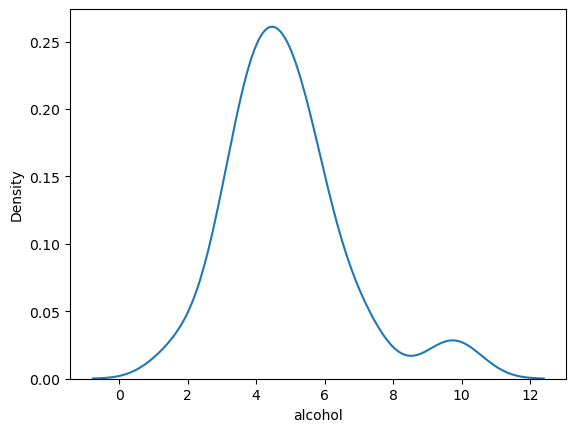

In [5]:
sns.kdeplot(carCrashes_df['alcohol'])

## Joint plot
Jointplot compares 2 distributions and plots a scatter plot by default.  
As we can see as people tend to speed they also tend to drink & drive.  
With **kind** you can create a regression line with kind='reg'.  
You can create a 2D KDE with kind='kde'.  
Kernal Density Estimation estimates the distribution of data.  
You can create a hexagon distribution with kind='hex'.

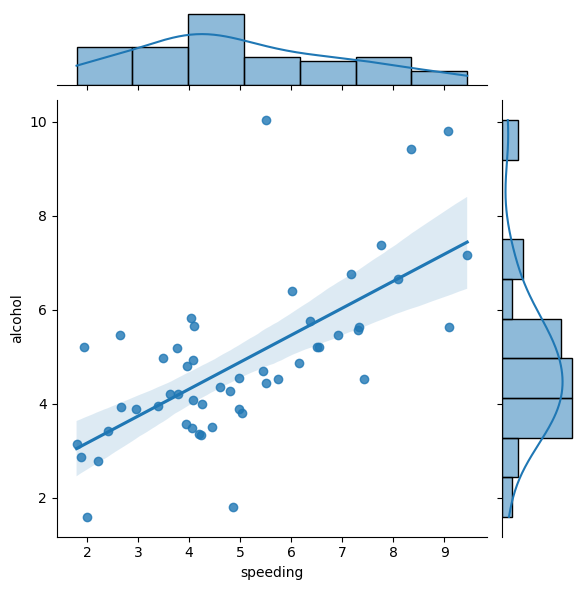

In [6]:
sns.jointplot(x='speeding', y='alcohol', data=carCrashes_df, kind='reg')

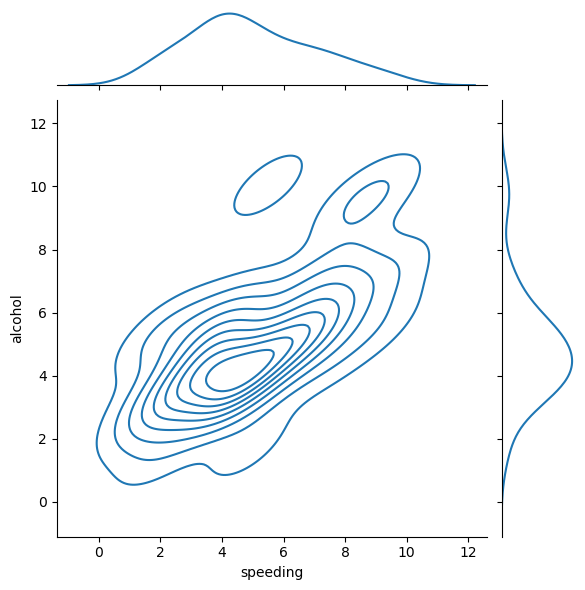

In [7]:
sns.jointplot(x='speeding', y='alcohol', data=carCrashes_df, kind='kde')

## Pair plots
ploting relationship between two params for every possible pair in dataframe

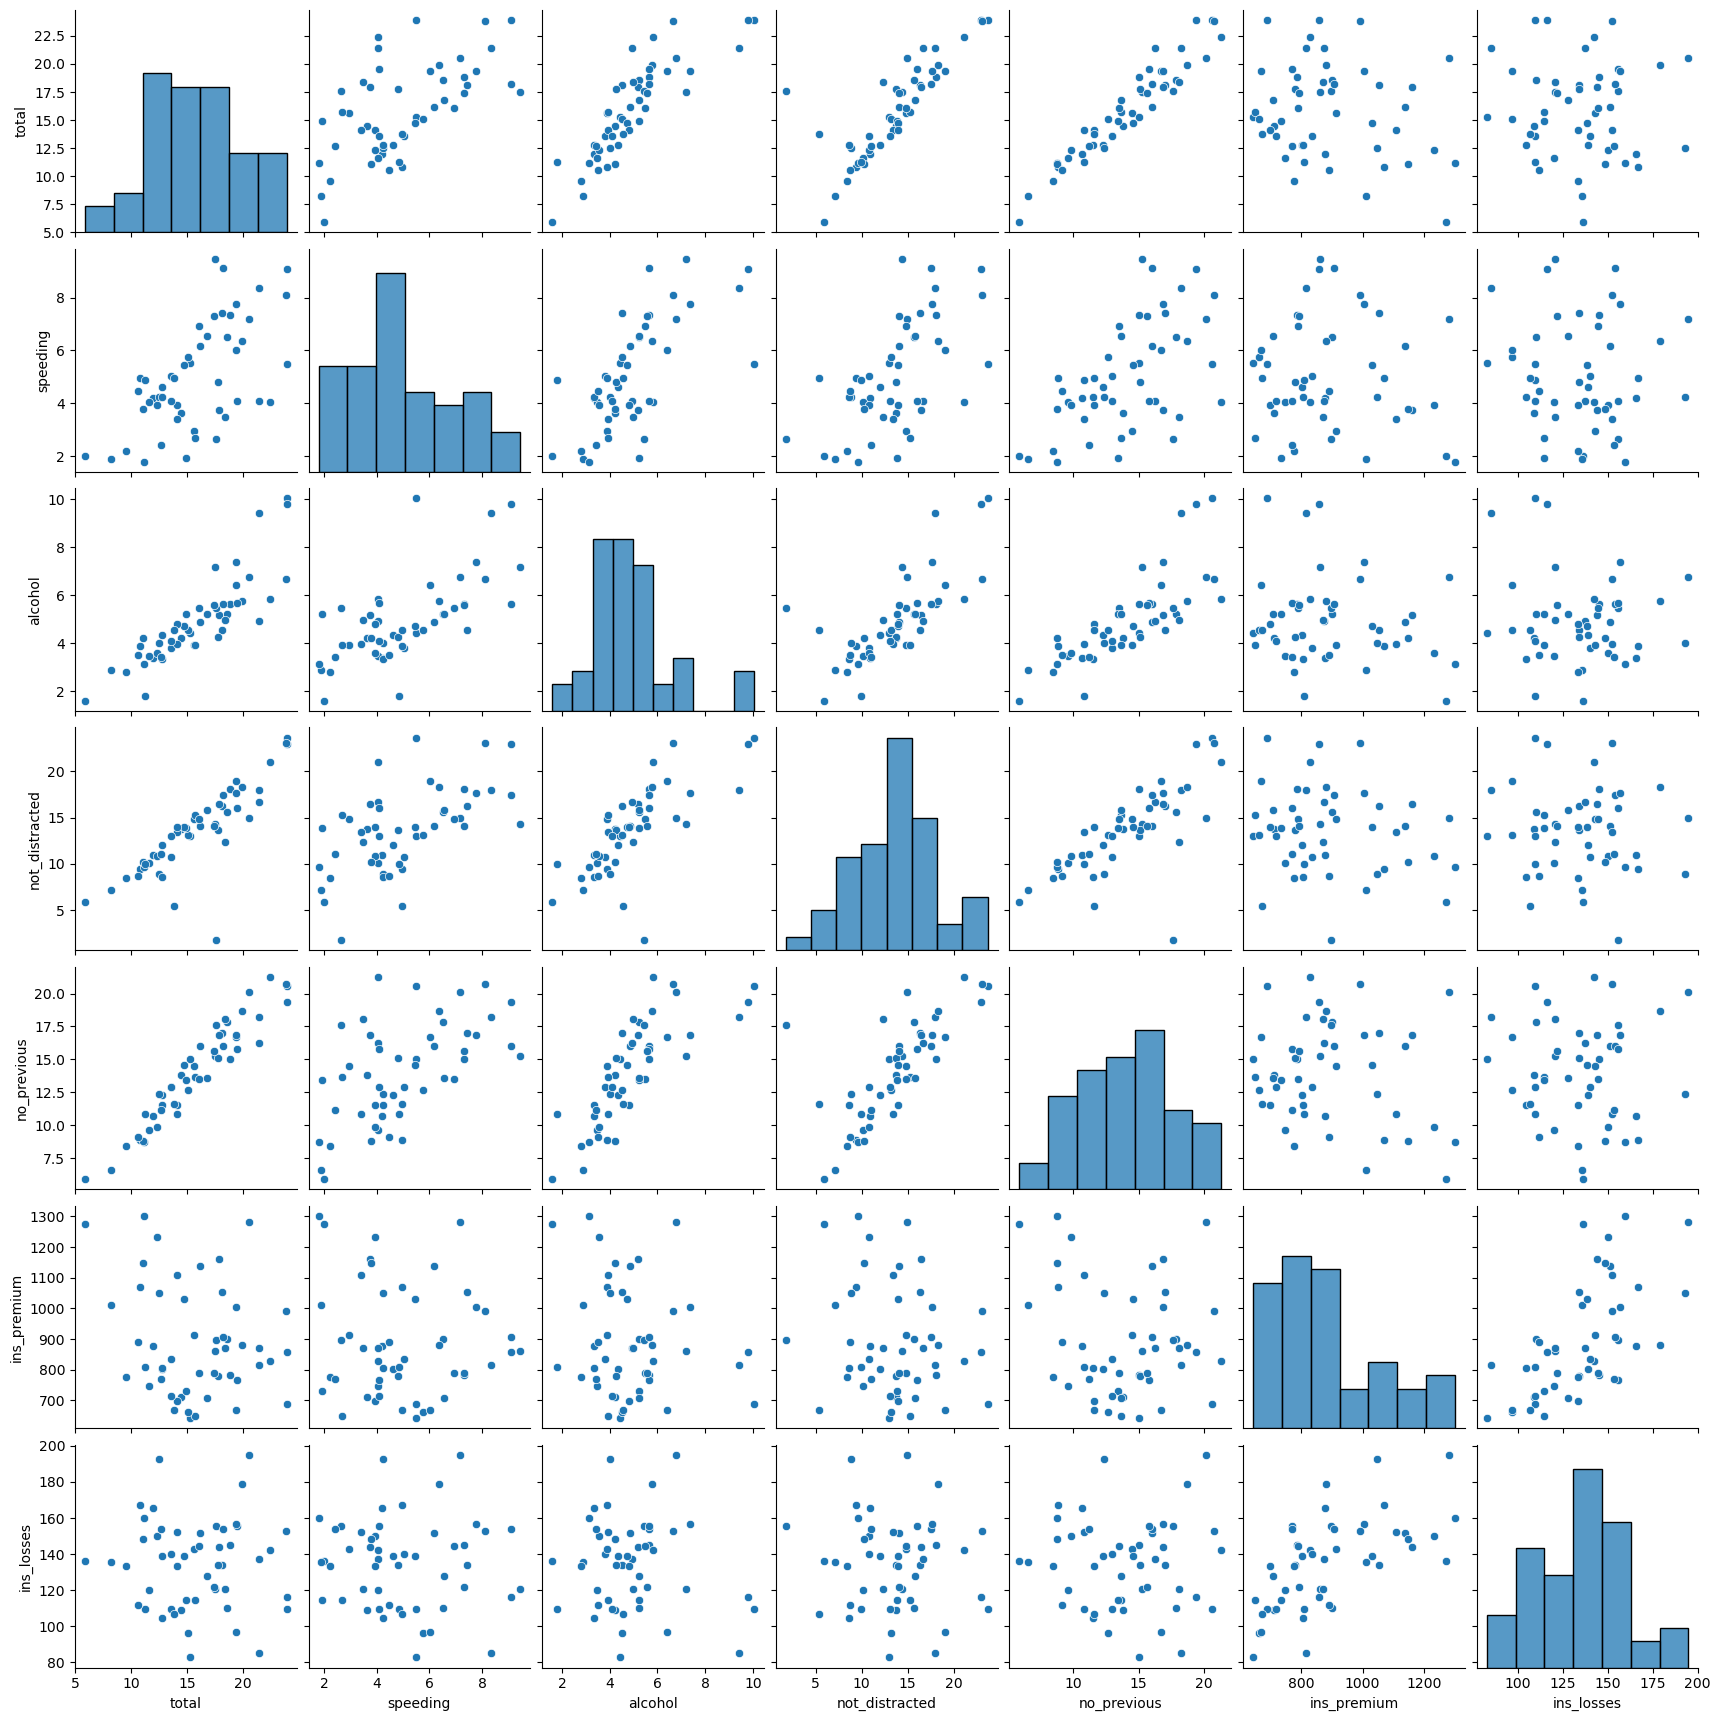

In [8]:
sns.pairplot(carCrashes_df)

now, below are some customizations you can make in pair plots

In [9]:
tip_df = sns.load_dataset('tips')
tip_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


this is the new, now let's say we want to compare between a category, let's say for male vs female.  
in that case we will use **'hue'** argument, where we give column name for a categorical classification on which it will compare data.  
now we can also use **pallete** argument to pass on the color pallete we can use for our graphs.  
example colors: 'Blues', 'Reds', 'Green', 'viridis' (green + blue), 'plasma' (violet, orange).  
here are the color pallete options available  
![color palletes 1](1.png)  
![color palletes 2](2.png)  
![color palletes 3](3.png)  
![color palletes 4](4.png)  
![color palletes 5](5.png)  

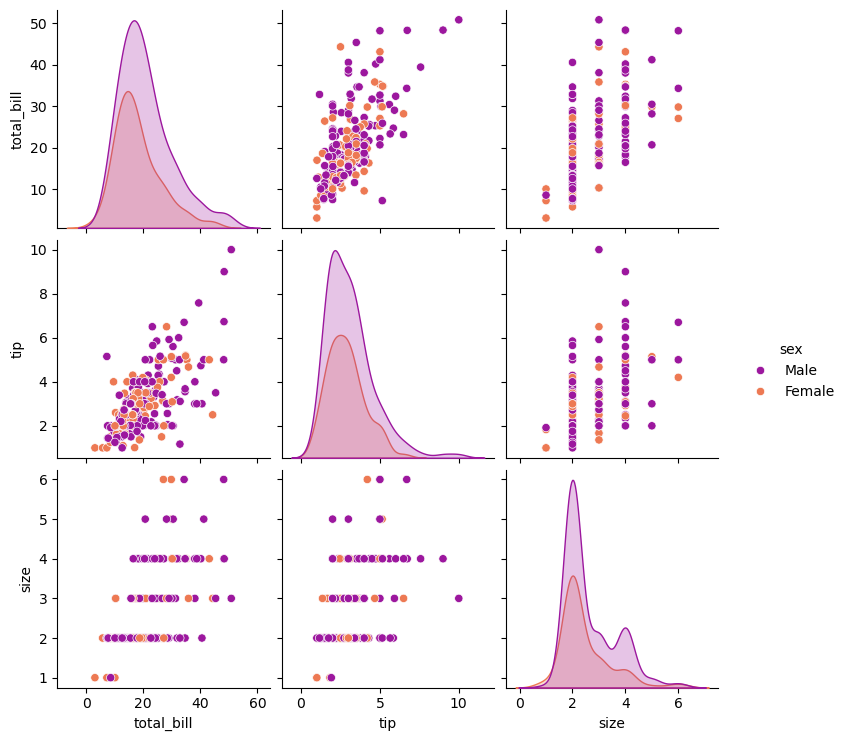

In [10]:
sns.pairplot(tip_df, hue='sex', palette='plasma')

## Categorical graphs: Bar plot
in bar plot we compare a numerical argument across different categories.  
like, let's say we want to compare total bill amount as per gender.  
**'estimator'** argument is used to tell seaborn on which data to use as estimator, like if chosen 'mean' (Default) it will compare the mean of bot sex.

<Axes: xlabel='sex', ylabel='total_bill'>

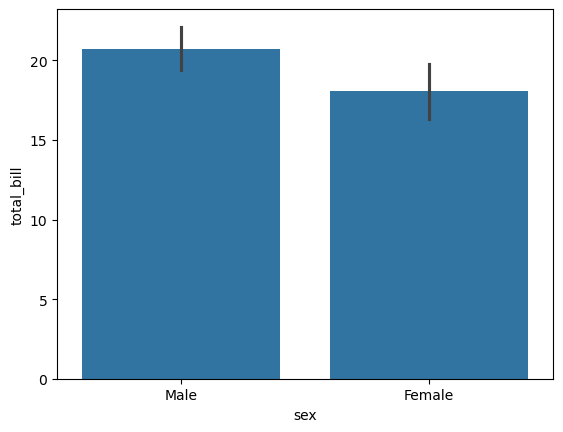

In [11]:
sns.barplot(x='sex', y='total_bill', data=tip_df, estimator=np.mean)

## Count plot
here we make a bar graph which shows frequency of occurance of each category in a dataframe

<Axes: xlabel='sex', ylabel='count'>

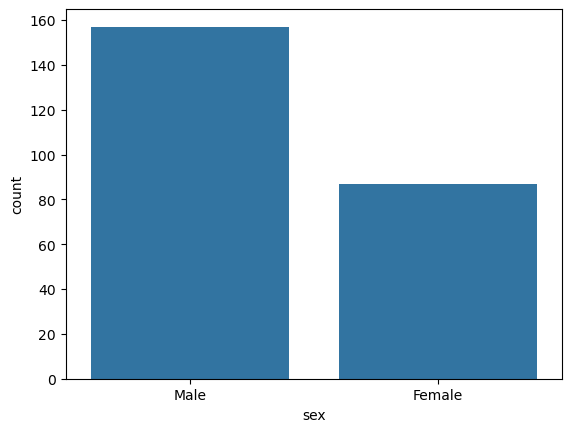

In [12]:
sns.countplot(x='sex', data=tip_df)

## Box plot
how men vs women spend on each day of week

<Axes: xlabel='day', ylabel='total_bill'>

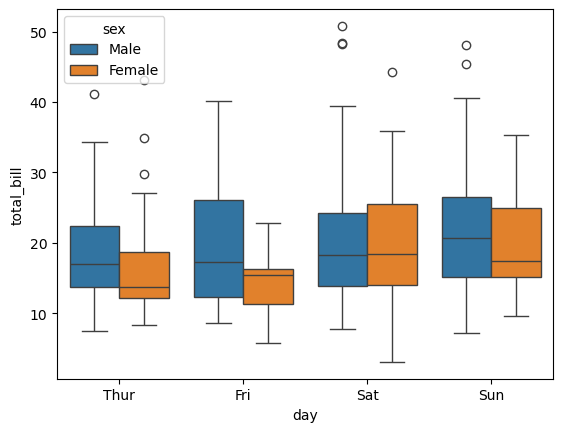

In [13]:
sns.boxplot(x='day', y='total_bill', data=tip_df, hue='sex')

### here's how to read box plot
**Box** → Shows the middle 50% of the data (called the interquartile range, IQR).  

**Bottom of the box** → 1st quartile (Q1, 25th percentile).  

**Top of the box** → 3rd quartile (Q3, 75th percentile).  

**The height of the box** → Q3 – Q1 = IQR.  

**Line inside the box** → The median (Q2, 50th percentile).  

**Whiskers** (lines extending from the box) → Show data spread outside the box.
Usually go up to the smallest and largest data points within 1.5 × IQR from the quartiles.

If data is beyond that range, it’s considered an outlier.  

**Dots or stars outside**: whiskers → Outliers (values unusually far from the rest of the data).

## Violin plot
it's a combination of KDE plot and box plot

<Axes: xlabel='day', ylabel='total_bill'>

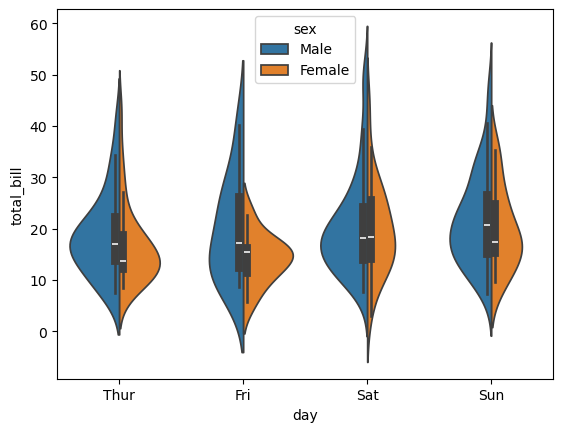

In [14]:
sns.violinplot(x='day', y='total_bill', data=tip_df, hue='sex', split=True)

## Strip plot
it shows scattered points against a numerical and a categorical data.  
**'jitter'** set to true means we want our data to be spreadout horizontaly, while false means they should be in a line.  

<Axes: xlabel='day', ylabel='total_bill'>

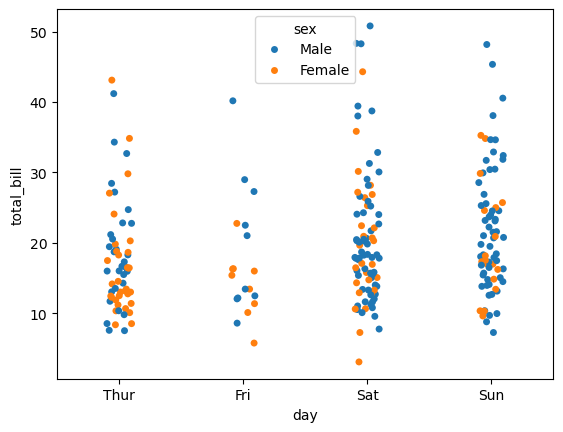

In [15]:
sns.stripplot(x='day', y='total_bill', data=tip_df, hue='sex', jitter=True)

## Styling and cutomizations
### Size

<Axes: xlabel='day', ylabel='total_bill'>

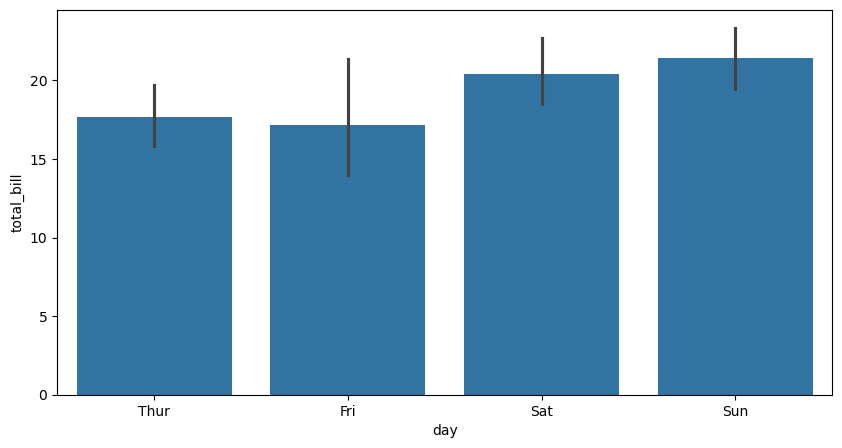

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x='day', y='total_bill', data=tip_df)

### Colors
you can scroll up to the pair plot section where i have already explained color palletes  
### Legend position
you can change the position of legend if it ostructs your graph contents in the following ways.  
here's guide on different values for **'loc'**  upper right: 1, upper left: 2, lower left: 3, lower right: 4,

**Note** = this plt.legend should be set after defining sns plot

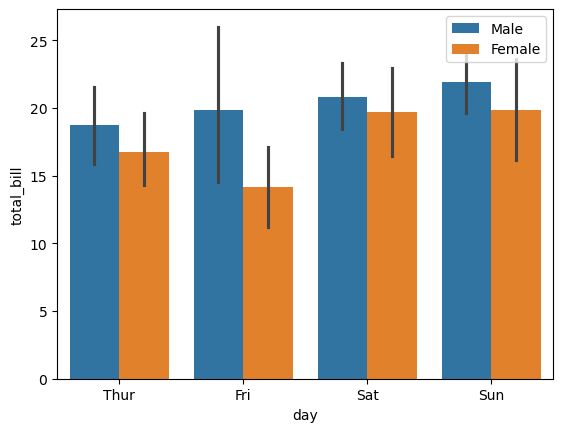

In [17]:
sns.barplot(x='day', y='total_bill', data=tip_df, hue='sex')
plt.legend(loc=1)

## Matrix plots

### 1. Heat maps
heat maps plot show **correlation** (not just correlation, it can be used to show any kind of value given a valid numpy array or pandas dataframe i.e., matrix) between different columns in a dataframe with colors' intensities.

**what is correlation?**: It's a matrix of numbers where each number (between -1 and 1) shows how the two data on each axes influence each other. an example of such a correlation matrix is below

as you can see speeding affects speed by 1. i.e., same data  
now let's see the heatmap plot  
here **anot** means if you want the correlation coefficient to be on the grid boxes or not

In [18]:
crashMatrix = carCrashes_df.select_dtypes(include=[np.number]).corr()
crashMatrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<Axes: >

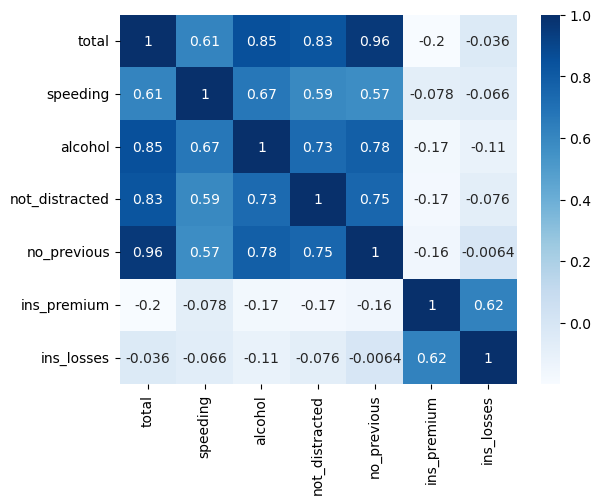

In [30]:
sns.heatmap(data=crashMatrix, annot=True, cmap='Blues')

this was one way to make a heatmap. let's see another way where we use **pivot table**  
**Pivot table** is just a way to show large datasent in a more simpler or custom way.  
    here, **'index'** becomes row, **'columns'** stays column and **'values'** is the value shown in each cell.

In [24]:
flights = sns.load_dataset('flights')
indexed = flights.pivot_table(index='month', columns='year', values='passengers')
(indexed)

C:\Users\Shashi\AppData\Local\Temp\ipykernel_15244\219032066.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  indexed = flights.pivot_table(index='month', columns='year', values='passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


now we have got a dataframe that can easily be converted to a correlation matrix.  
**here's also some custimazations we can use to make our heatmap better**

<Axes: xlabel='year', ylabel='month'>

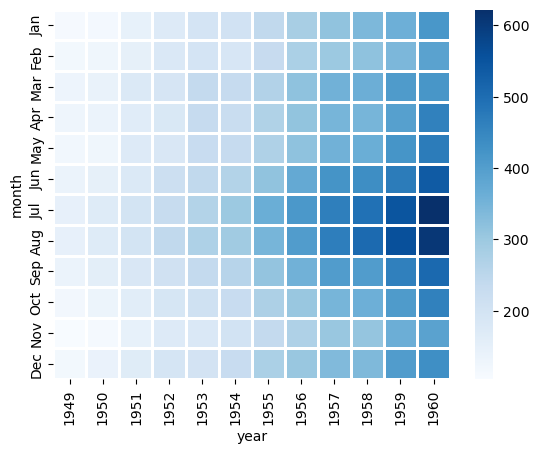

In [28]:
sns.heatmap(data=indexed, cmap='Blues', linecolor='white', linewidth=1)

## Pair grid - Didn't understand, will do if needed
so while pair plot does the job easily, pair grid gives us more control over our plots with parameters to customize each plot.

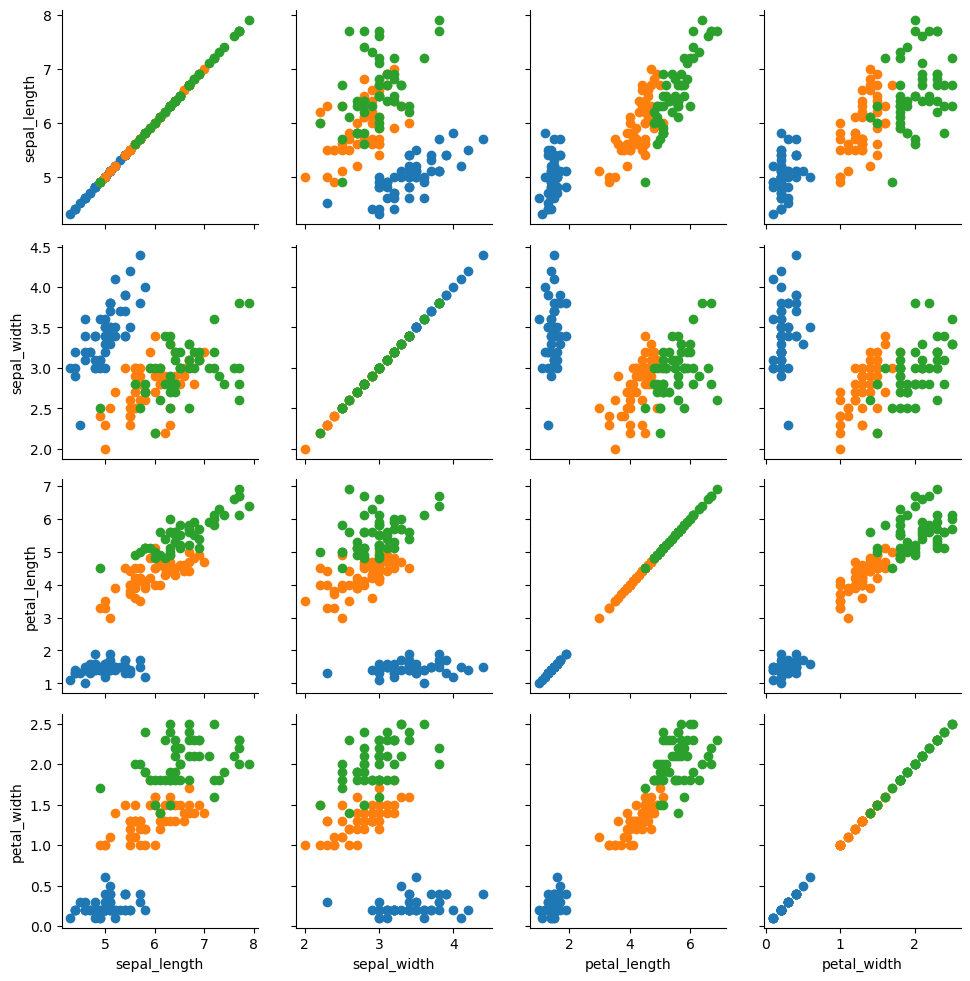

In [36]:
iris = sns.load_dataset('iris')
pairGrid = sns.PairGrid(iris, hue='species')
pairGrid.map(plt.scatter)

## Regression plot
this plot helps us see the relationship between two variables and see how a linear regression model will fit the data.  
**sns.lmplot** is the call

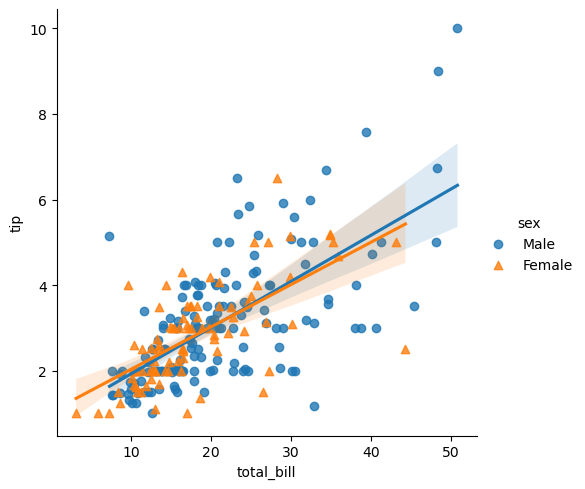

In [39]:
sns.lmplot(data=tip_df, hue='sex', x='total_bill', y='tip', markers=['o', '^'])